In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chadwambles/supermarket-sales")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'supermarket-sales' dataset.
Path to dataset files: /kaggle/input/supermarket-sales


In [ ]:
import os

print("Files in dataset folder:")
print(os.listdir(path))

Files in dataset folder:
['Product Performance KPIs.sql', 'Creation Queries.sql', 'Sales and Revenue KPIs.sql', 'sales.csv', 'Customer Behavior KPIs.sql']


In [ ]:
import pandas as pd

file_path = os.path.join(path, "sales.csv")
df = pd.read_csv(file_path)

print(df.shape)
print(df.head())
print(df.info())

(1000, 12)
   sale_id branch         city customer_type  gender  product_name  \
0        1      A     New York        Member    Male       Shampoo   
1        2      B  Los Angeles        Normal  Female      Notebook   
2        3      A     New York        Member  Female         Apple   
3        4      A      Chicago        Normal    Male     Detergent   
4        5      B  Los Angeles        Member  Female  Orange Juice   

  product_category  unit_price  quantity   tax  total_price  reward_points  
0    Personal Care        5.50         3  1.16        17.66              1  
1       Stationery        2.75        10  1.93        29.43              0  
2           Fruits        1.20        15  1.26        19.26              1  
3        Household        7.80         5  2.73        41.73              0  
4        Beverages        3.50         7  1.72        26.22              2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):


## Basic Exploration

In [ ]:
# check unique values
for col in ['branch', 'city', 'customer_type', 'gender', 'product_category']:
    print(f"{col}: {df[col].unique()}")


branch: ['A' 'B']
city: ['New York' 'Los Angeles' 'Chicago']
customer_type: ['Member' 'Normal']
gender: ['Male' 'Female']
product_category: ['Personal Care' 'Stationery' 'Fruits' 'Household' 'Beverages']


In [ ]:
df.describe(include="all")


,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
count,1000.000000,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,2,3,2,2,5,5,NaN,NaN,NaN,NaN,NaN
top,NaN,A,New York,Member,Male,Shampoo,Fruits,NaN,NaN,NaN,NaN,NaN
freq,NaN,674,344,516,528,224,209,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,NaN,10.836110,10.337000,7.758010,118.583900,6.057000
std,288.819436,NaN,NaN,NaN,NaN,NaN,NaN,5.775924,6.029908,6.538066,99.936441,9.350464
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.020000,1.000000,0.080000,1.210000,0.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,NaN,5.867500,5.000000,2.510000,38.380000,0.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,NaN,10.615000,10.000000,5.870000,89.705000,0.000000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,NaN,15.882500,16.000000,11.522500,176.072500,10.000000


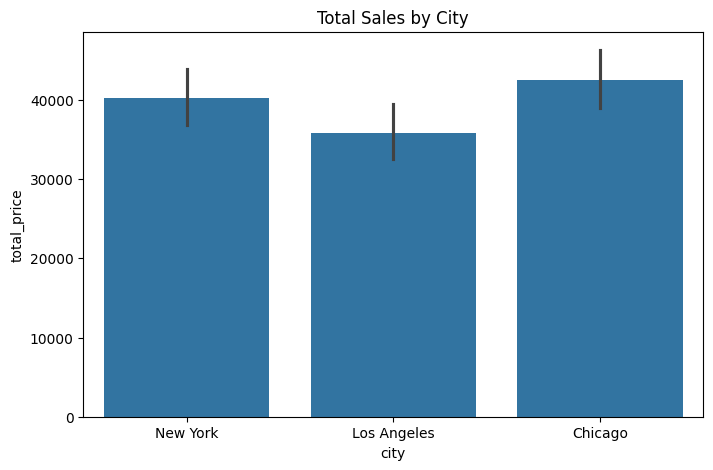

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x="city", y="total_price", data=df, estimator=sum)
plt.title("Total Sales by City")
plt.show()


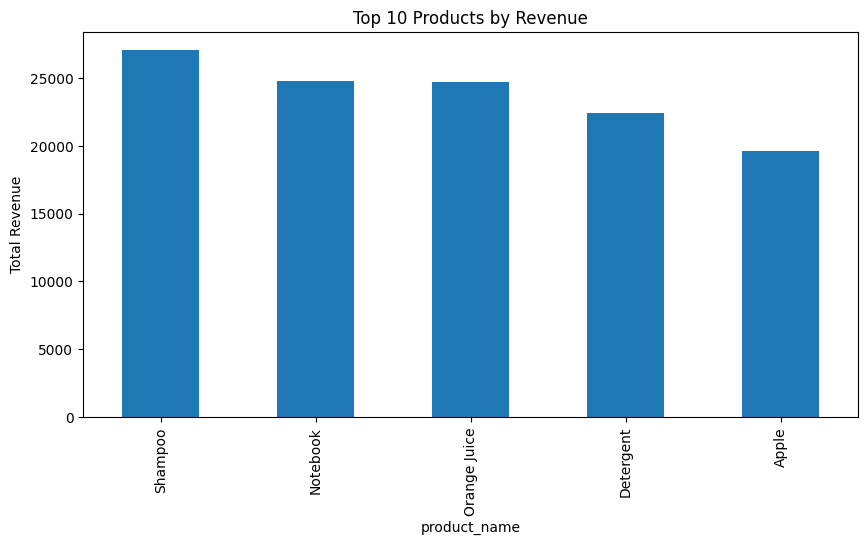

In [ ]:
top_products = df.groupby("product_name")["total_price"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", figsize=(10,5), title="Top 10 Products by Revenue")
plt.ylabel("Total Revenue")
plt.show()


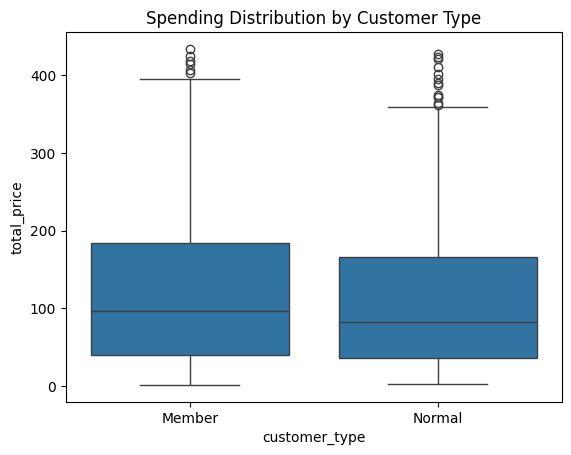

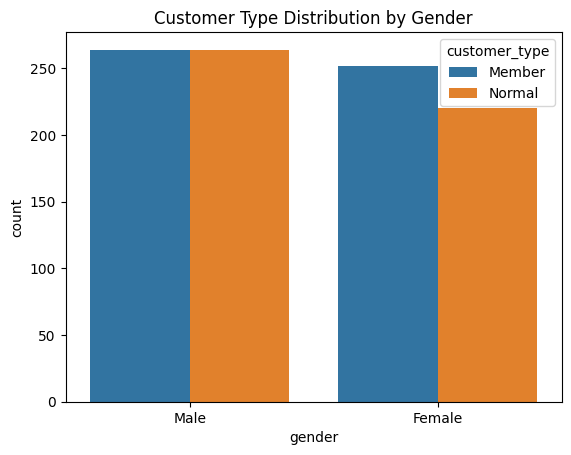

In [ ]:
sns.boxplot(x="customer_type", y="total_price", data=df)
plt.title("Spending Distribution by Customer Type")
plt.show()

sns.countplot(x="gender", hue="customer_type", data=df)
plt.title("Customer Type Distribution by Gender")
plt.show()


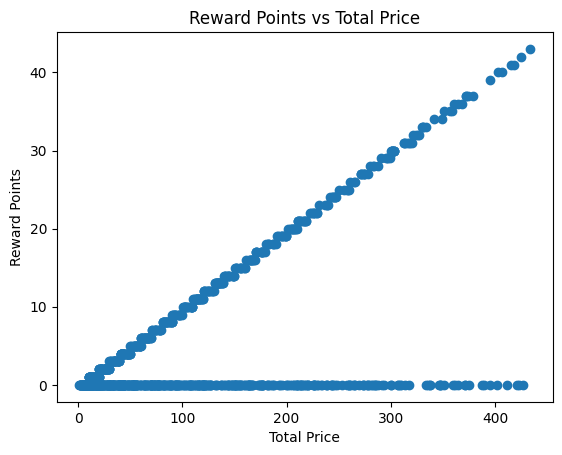

In [ ]:
plt.scatter(df["total_price"], df["reward_points"])
plt.xlabel("Total Price")
plt.ylabel("Reward Points")
plt.title("Reward Points vs Total Price")
plt.show()
